Employee registry analysis

In [151]:
#importing section
import numpy as np
import matplotlib.pyplot as  plt
import pandas as pd

In [12]:
#make dataframe
df = pd.read_csv('employee_registry_dump_raw.csv')
print(df.shape)
df.head(5)

(10500, 9)


,ID,Name,Age,City,Join Date,Salary,Email,Notes,Unnamed: 0
0,2841,NaN,30,NY,NaN,NaN,user.com,Good,82
1,7427,Charlie,-5,NY,2021/01/01,120000,NaN,#Special@Char$,91
2,2103,BOB,25,Delhi,NaN,75000,NaN,#Special@Char$,75
3,7979,Bob,NaN,NaN,NaN,75000,NaN,Excellent!,80
4,8443,NaN,NaN,DEL,2021/01/01,50000,user@@example,NaN,61


   * How many missing values are there in each column?

In [32]:
total_missing_values = df.isna().sum().sum()
print(f'total missing valuess are ----->{total_missing_values}')
each_column_missing = df.isna().sum()
print('missing vaues in each column\n',each_column_missing)


total missing valuess are ----->21235
missing vaues in each column
 ID               0
Name          2606
Age              0
City          2724
Join Date     3509
Salary        2986
Email         4205
Notes         5205
Unnamed: 0       0
dtype: int64


In [13]:
#chech data type and null values 
print(df.info())
df.isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          10500 non-null  int64 
 1   Name        7894 non-null   object
 2   Age         7957 non-null   object
 3   City        7776 non-null   object
 4   Join Date   6991 non-null   object
 5   Salary      7514 non-null   object
 6   Email       6295 non-null   object
 7   Notes       5295 non-null   object
 8   Unnamed: 0  10500 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 738.4+ KB
None


,ID,Name,Age,City,Join Date,Salary,Email,Notes,Unnamed: 0
0,False,True,False,False,True,True,False,False,False
1,False,False,False,False,False,False,True,False,False
2,False,False,False,False,True,False,True,False,False
3,False,False,True,True,True,False,True,False,False
4,False,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
10495,False,False,False,True,False,False,True,False,False
10496,False,False,False,False,False,False,False,True,False
10497,False,False,False,False,True,True,True,True,False
10498,False,False,False,False,False,False,True,True,False


 Replace missing `Age` and `Salary` with appropriate values (mean/median or default).

In [37]:
#changing data types of Age column 
'''
Age column have null values and negaitve values so
1) Convert negative age into null values
2) Convert its data type object ------> float ------->int 
3) Replace null age into its mean

'''
print('old data type of Age is ------->',df.Age.dtype)
df.loc[df['Age']<0,'Age'] = np.nan  # this line converts the negative vlaue into NULL valuez 
df['Age'] = pd.to_numeric(df['Age'],errors='coerce')
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Age'] = df.Age.astype(int)
print('changed data type of Age is ------->',df.Age.dtype)
print(".........changed values........")
df['Age']



old data type of Age is -------> int32
changed data type of Age is -------> int32
.........changed values........


0        30
1        55
2        25
3        48
4        48
         ..
10495    48
10496    45
10497    55
10498    25
10499    55
Name: Age, Length: 10500, dtype: int32

In [46]:
#cahanging Salary clumns
print('old data type of Age is ------->',df.Salary.dtype)
df.Salary = pd.to_numeric(df['Salary'],errors='coerce')
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())
df['Salary']= df['Salary'].astype(int)
print('changed data type of Age is ------->',df.Salary.dtype)
df['Salary']



old data type of Age is -------> int32
changed data type of Age is -------> int32


0         61335
1        120000
2         75000
3         75000
4         50000
          ...  
10495     75000
10496     50000
10497     61335
10498     61335
10499     61335
Name: Salary, Length: 10500, dtype: int32

   * Fill missing `City` and `Name` with `"Unknown"`.

In [98]:
# changing data type and repleacing its Nan values 
print('old data type of City is ------->',df.City.dtype)
print(df['City'])
df['City'] = df['City'].replace('nan','Unknown')
df['City'] =df['City'].astype(str)
print('changed data type of City is ------->',df.City.dtype)

# now we convert NY ------> NewYork , DEL -------> Delhi
df['City'] = df['City'].str.lower()
df['City'].value_counts()
city_map = {
    'delhi':'Delhi',
    'del':'Delhi',
    'newyork':'NewYork',
    'ny':'NewYork'
    # 'nan':'Unknown'

}
df['City']=df['City'].replace(city_map)
print(df['City'])
print('All cities are-------->',df['City'].unique())


old data type of City is -------> object
0        NewYork
1        NewYork
2          Delhi
3        unknown
4          Delhi
          ...   
10495    unknown
10496    NewYork
10497      Delhi
10498    NewYork
10499      Delhi
Name: City, Length: 10500, dtype: object
changed data type of City is -------> object
0        NewYork
1        NewYork
2          Delhi
3        unknown
4          Delhi
          ...   
10495    unknown
10496    NewYork
10497      Delhi
10498    NewYork
10499      Delhi
Name: City, Length: 10500, dtype: object
All cities are--------> ['NewYork' 'Delhi' 'unknown']


In [108]:
#replace name with unknown 
print(df['Name'])
df.Name.duplicated()
df['Name']=df['Name'].str.title()
df['Name'] = df['Name'].str.replace('@', 'a', regex=False)
df['Name'] = df['Name'].fillna('Unknown')
df['Name'] = df['Name'].str.capitalize()

df['Name']

0     Unknown
1     Charlie
2         Bob
6       Alice
11    ChaRlie
16       Alic
Name: Name, dtype: object


0     Unknown
1     Charlie
2         Bob
6       Alice
11    Charlie
16       Alic
Name: Name, dtype: object

In [126]:
#explore Email 
df.Email
df['Email'] = df['Email'].astype(str).str.lower().str.strip()
df['Email'] = df['Email'].replace('nan',np.nan)
df['Email'] = df['Email'].fillna('user.com')
df.loc[df['Email']=='user.com','Email'] =df['Name'].str.lower()+'@.com' 
df.head()

,ID,Name,Age,City,Join Date,Salary,Email,Notes,Unnamed: 0
0,2841,Unknown,30,NewYork,NaN,61335,unknown@.com,Good,82
1,7427,Charlie,55,NewYork,2021/01/01,120000,charlie@.com,#Special@Char$,91
2,2103,Bob,25,Delhi,NaN,75000,bob@.com,#Special@Char$,75
6,5341,Alice,48,Delhi,NaN,61335,alice@.com,NaN,23
11,6644,Charlie,48,Delhi,NaN,61335,charlie@.com,NaN,19


In [160]:
# now change joining date
print('old data type is------->',df['Join Date'].dtype)
df['Join Date'] = pd.to_datetime(df['Join Date'],errors='coerce')
print('old data type is------->',df['Join Date'].dtype)
df['Join Date'] = df['Join Date'].fillna(pd.Timestamp('2000-01-01')) #default date 
df['Join_Year'] = df['Join Date'].dt.year
df.head()




old data type is-------> datetime64[ns]
old data type is-------> datetime64[ns]


,ID,Name,Age,City,Join Date,Salary,Email,Notes,Unnamed: 0,Join_Year
0,2841,Unknown,30,NewYork,2000-01-01,61335,unknown@.com,Good,82,2000
1,7427,Charlie,55,NewYork,2021-01-01,120000,charlie@.com,#Special@Char$,91,2021
2,2103,Bob,25,Delhi,2000-01-01,75000,bob@.com,#Special@Char$,75,2000
6,5341,Alice,48,Delhi,2000-01-01,61335,alice@.com,NaN,23,2000
11,6644,Charlie,48,Delhi,2000-01-01,61335,charlie@.com,NaN,19,2000


#Vizuals

1. What is the average age and salary of employees?


avg age is ----> 39
avg salary is ----> 73390


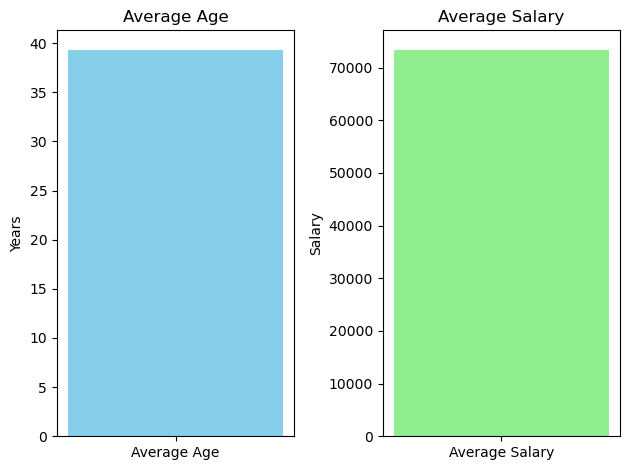

In [ ]:
avg_age = df['Age'].mean()
avg_salary =df['Salary'].mean()
print('avg age is ---->',int(avg_age))
print('avg salary is ---->',int(avg_salary))
plt.subplot(1, 2, 1)
plt.bar(['Average Age'], [avg_age], color='skyblue')
plt.title('Average Age')
plt.ylabel('Years')


plt.subplot(1, 2, 2)
plt.bar(['Average Salary'], [avg_salary], color='lightgreen')
plt.title('Average Salary')
plt.ylabel('Salary')

plt.tight_layout()